In [1]:
from planetplanet import Planet, Star, System
from planetplanet.constants import *
from planetplanet.photo.maps import UniformMap

In [2]:
from IPython.display import display, Math, Latex
import numpy as np 

%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 

In [3]:
import os, sys

In [4]:
from astropy.constants import *
M_je = M_jup / M_earth
R_je = R_jup / R_earth

In [5]:
# Kepler-16 information
A_mass   =    0.6897
A_radius =    0.6489
A_teff   = 4450

B_mass   =    0.20255
B_radius =    0.22623
B_teff   = 3000 # ?

B_per   =  41.079220
B_inc   =  90.3401 
B_ecc   =   0.15944
B_w     = 263.464 # Longitude of pericenter 
B_Omega =   0     # Longitude of ascending node

b_mass   = 0.333
b_radius = 0.7538

b_per   = 228.776
b_inc   =  90.0322
b_ecc   =   0.0069
b_w     = 318
b_Omega = 0.003

### unused information
B_a      =   0.22431 # semi-major axis
B_lambda =  92.3520  # mean longitude 

b_a      =   0.7048
b_lambda = 106.51

In [6]:
A = Star('A', m=A_mass, r=A_radius, teff=A_teff, 
    nz=31, color='gold', limbdark=[1, 0])

B = Star('B', m=B_mass, r=B_radius, teff=3000,
    per=B_per, inc=B_inc, ecc=B_ecc, w=B_w, Omega=B_Omega, 
    t0=8,
    host=None,
    nz=31, color='darkblue', limbdark=[1, 0])

planet = Planet('b', m=b_mass*M_je, r=b_radius*R_je, 
    per=b_per, inc=b_inc, ecc=b_ecc, w=b_w, Omega=b_Omega, 
    t0=203,
    host=None,
    nz=1, color='green', radiancemap=UniformMap())

system = System(A, B, planet, 
    nbody=True, 
    integrator='ias15',
    quiet=False,
    timestep=MINUTE)

time = np.arange(-60, 575, MINUTE)

system.compute(time, lambda1=0.4, lambda2=0.865)#, R=0.01)

Plotting the light curve...


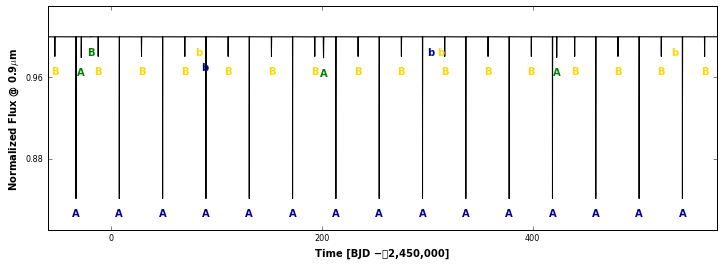

In [7]:
fig, ax = system.plot_lightcurve(wavelength=0.865, interactive=False)
plt.ylim([0.81, 1.03])
#system.plot_occultation('A', time = 8, wavelength = 0.75,
#                            full_lightcurve = True)
#plt.show()
plt.savefig('Kepler16model.png', bbox_inches='tight')

(<matplotlib.figure.Figure at 0x2b81227e8470>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b812317d0f0>,
       dtype=object))

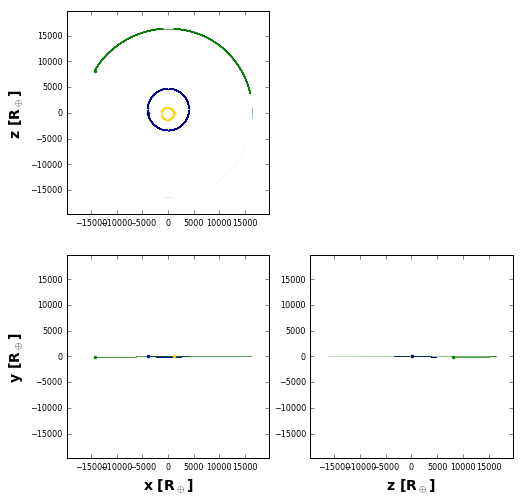

In [9]:
system.plot_orbits(trail_dur=b_per*3/4)